# DATA 515: Software Design Homework 1
### Joel Stremmel

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. 
Read the CSV file into a pandas dataframe.

In [2]:
df = pd.read_csv('../data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv')

In [3]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


### 2. 
Add columns to the dataframe containing:
- The total (East + West) bicycle count
- The hour of the day
- The year

In [4]:
df['Total'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [6]:
df['Hour'] = df['Date'].dt.hour

In [7]:
df['Year'] = df['Date'].dt.year

In [8]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour,Year
0,2019-03-31 23:00:00,6.0,10.0,16.0,23,2019
1,2019-03-31 22:00:00,7.0,14.0,21.0,22,2019
2,2019-03-31 21:00:00,18.0,15.0,33.0,21,2019
3,2019-03-31 20:00:00,26.0,31.0,57.0,20,2019
4,2019-03-31 19:00:00,30.0,58.0,88.0,19,2019


### 3.
Create a dataframe with the subset of data from the year 2016

In [9]:
s_df = df[df['Year'] == 2016]

In [10]:
s_df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour,Year
19680,2016-12-31 23:00:00,4.0,4.0,8.0,23,2016
19681,2016-12-31 22:00:00,7.0,8.0,15.0,22,2016
19682,2016-12-31 21:00:00,4.0,6.0,10.0,21,2016
19683,2016-12-31 20:00:00,3.0,6.0,9.0,20,2016
19684,2016-12-31 19:00:00,6.0,4.0,10.0,19,2016


### 4. 
Use pandas + matplotlib to plot the counts by hour.

In [11]:
grouped_df = df.groupby('Hour').sum().reset_index()

In [12]:
ams = ['12 AM'] + [str(i)+' AM' for i in range(1, 12)]
pms = ['12 PM'] + [str(i)+' PM' for i in range(1, 12)]
labels = ams + pms

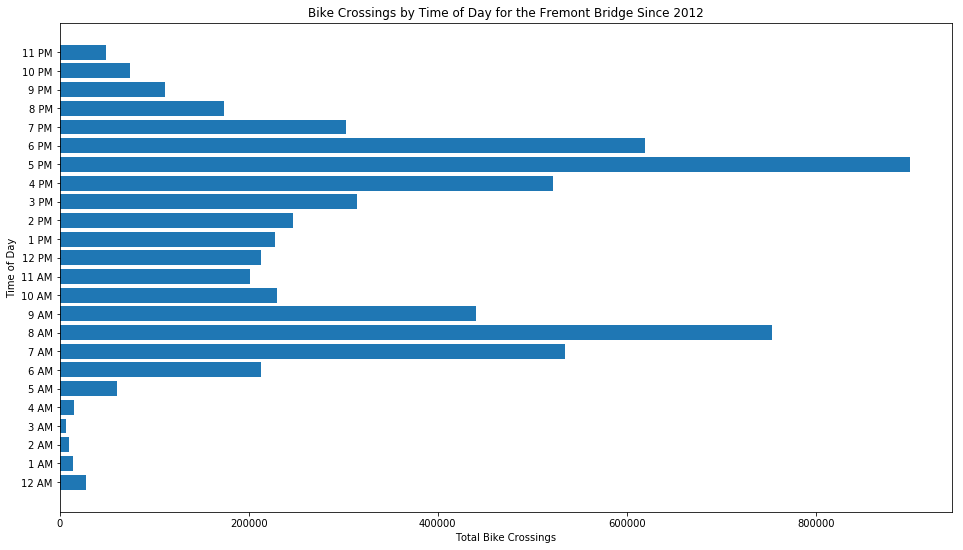

In [13]:
plt.rcParams["figure.figsize"] = [16,9]
plt.barh(grouped_df['Hour'], grouped_df['Total'], align='center')
plt.yticks(grouped_df['Hour'], labels)
plt.ylabel('Time of Day')
plt.xlabel('Total Bike Crossings')
plt.title('Bike Crossings by Time of Day for the Fremont Bridge Since 2012')
plt.show()

### 5. 
Use pandas to determine what is (on average) the busiest hour of the day.

In [14]:
grouped_df[grouped_df['Total'] == grouped_df['Total'].max()][['Hour', 'Total']]

,Hour,Total
17,17,899621.0


As one might expect, the busiest hour of the day for bike crossings is 5PM.